<a href="https://colab.research.google.com/github/salmanromeo/MAE_3403_Computer_Methods_in_Analysis_and_Design/blob/main/Thomas_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Consider the second-order ODE:

$f'' − f ' − 2 f = 2 + 6 sin(6x) − 38 cos(6x)$

defined on $0 ≤ x ≤ 2π$ with periodic boundary conditions.

As can be verified from the above equation, this ODE has an analytical true solution as follows

$f_{true}(x) = cos(6x) -1$

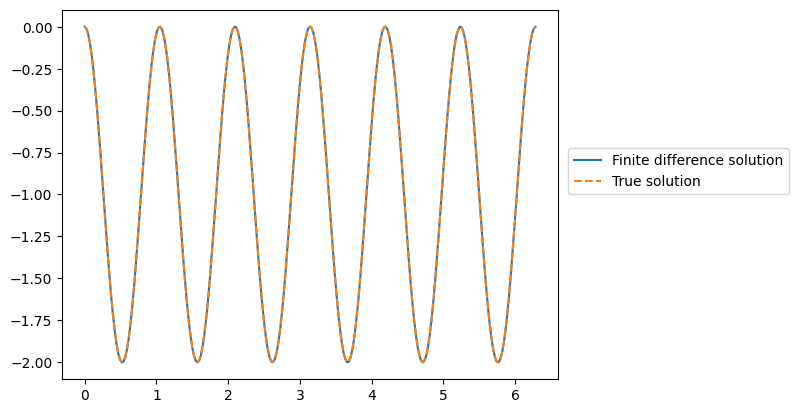

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 256
h = 2*np.pi/N
x = np.linspace(0, 2*np.pi, N+1)

aa = 1./(h**2) - 1./(2.*h)
bb =-2./(h**2) - 2.0
cc = 1./(h**2) + 1./(2.*h)
rhs = 2 + 6*np.sin(6*x) - 38*np.cos(6*x)

#Thomas algorithm (tridiagonal matrix solver)
A = [aa for i in range(0, N+1)]
B = [bb for i in range(0, N+1)]
C = [cc for i in range(0, N+1)]
D = [rhs[i] for i in range(0, N+1)]

f= np.zeros(N+1)
G= np.zeros(N+1)
Z= np.zeros(N+1)

#Forward pass
for i in range(1, N):
  G[i] = - ( C[i] * G[i-1] - D[i] ) / (B[i] + C[i] * Z[i-1])
  Z[i] = -                 A[i]  /(B[i] + C[i] * Z[i-1])

#Backward pass
for i in range(N-1, 0, -1):
  f[i] = G[i] + Z[i] * f[i+1]

# Plot the solution and the true solution
f_true = np.cos(6*x) - 1
plt.plot(x, f, '-', label='Finite difference solution')
plt.plot(x, f_true, '--', label='True solution')
plt.legend(loc=(1.02, 0.5))
plt.show()